In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

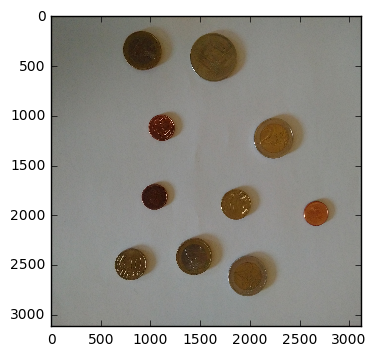

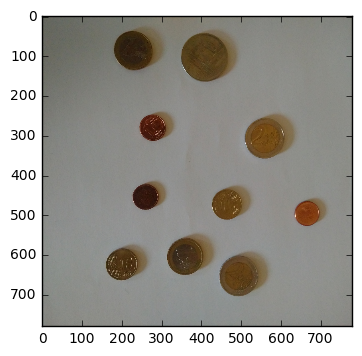

In [2]:
#read the image and show
path = './images/'
image_name = 'coins.jpg'
coins_img = imread (path.__add__(image_name))
coins_img = img_as_ubyte(coins_img)
plt.figure
plt.imshow(coins_img)
plt.show()

#rescale image and show
rescale_coins = rescale(coins_img, 1./4)
plt.figure
plt.imshow(rescale_coins)
plt.show()


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

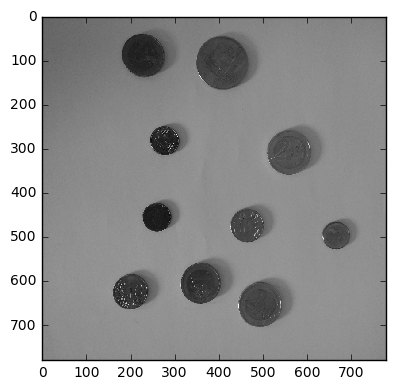

0.395128288335


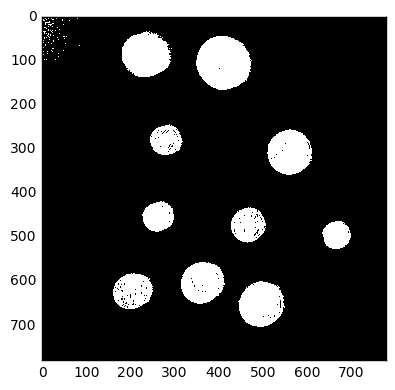

In [3]:
#change into gray scale
gray_coins = rgb2gray(rescale_coins)

#show the gray image
plt.figure
imshow(gray_coins)
plt.show()

#threshold 
thresh = threshold_otsu(gray_coins)
print (thresh)
binary_coins = gray_coins <= thresh

#show the binary image
plt.figure
imshow(binary_coins)
plt.show()


Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

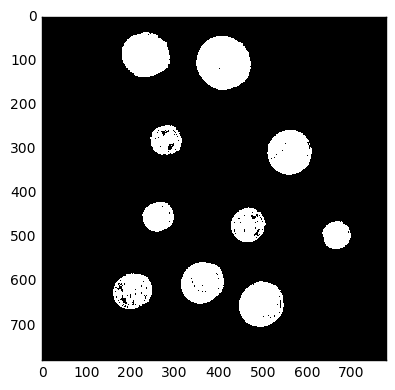

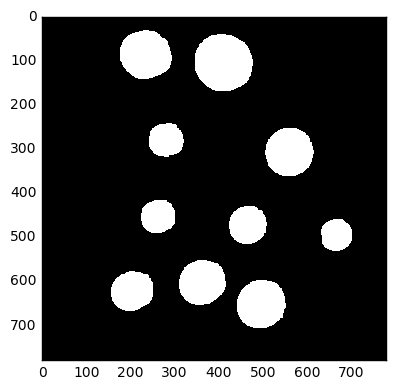

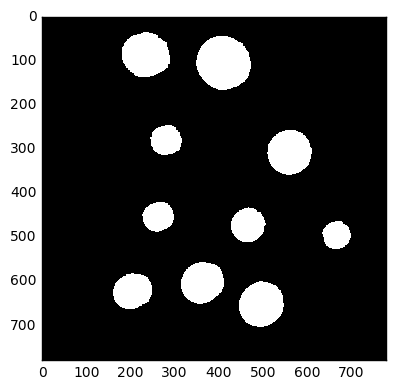

In [4]:
from skimage.morphology import square
from skimage.morphology import binary_dilation, binary_erosion

#image opening using element of size 3
open_coins = binary_opening (binary_coins, square(3))
plt.figure
imshow(open_coins)
plt.show()

#image dilation using element of size 8
dilated_coins = binary_dilation (open_coins, square(8))
plt.figure
imshow(dilated_coins)
plt.show()

#image erosion using element of size 8
eroded_coins = binary_erosion (dilated_coins, square(8))
plt.figure
imshow(eroded_coins)
plt.show()

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


C:\Users\whkj\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


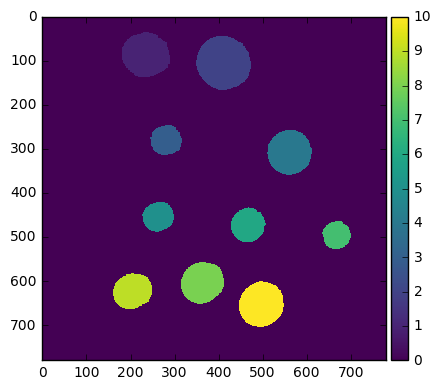

10
52.58779602878194
61.335997137131656
34.68733731168665
50.6232445983631
34.54480805132707
38.8431314457417
31.79547449747714
47.916272904345156
42.35557246138747
51.08330888788153


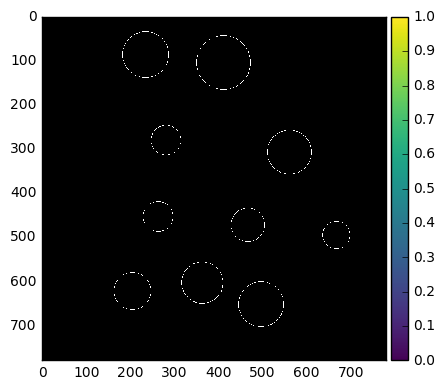

In [6]:
from skimage.measure import label,regionprops
from skimage.draw import circle_perimeter

#label the image and show
label_coins = label(eroded_coins, connectivity=2)
print (label_coins)
plt.figure
imshow(label_coins)
plt.show()

#get the regions of the coins
regions = regionprops(label_coins)
print (len(regions))

#get the redius of each coins & create a new 'same-sized' image and draw circles on it
circle_img = np.zeros((label_coins.shape[0], label_coins.shape[1], 3))
for obj in regions:
    redius = obj.equivalent_diameter/2.0
    r,c = obj.centroid
    print (redius)
    rr,cc = circle_perimeter(int(r), int(c), int(redius))
    circle_img [rr,cc] = 1

#show the drawing 
plt.figure
imshow(circle_img)
plt.show()
    





## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

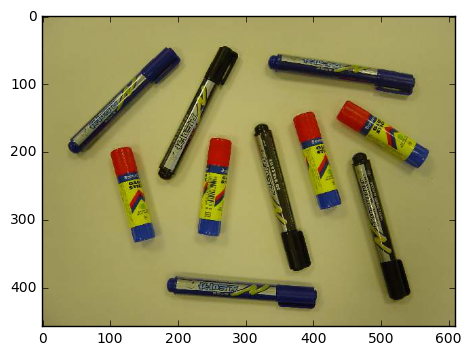

In [36]:
#read the image and show
path = './images/'
image_name = 'objets4.jpg'
objets_img = imread (path.__add__(image_name))
objets_img = img_as_ubyte(objets_img)
plt.figure
plt.imshow(objets_img)
plt.show()

#rescale image and show
#objets_img = rescale(objets_img, 1./3)
#plt.figure
#plt.imshow(objets_img)
#plt.show()

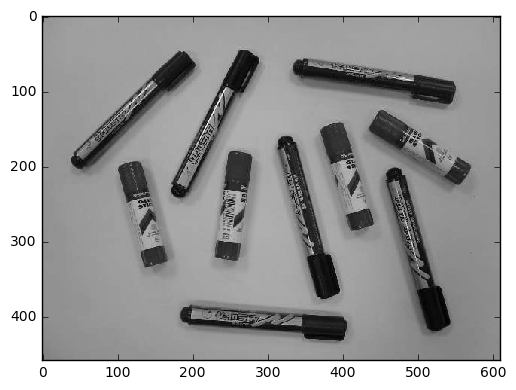

0.382993717831


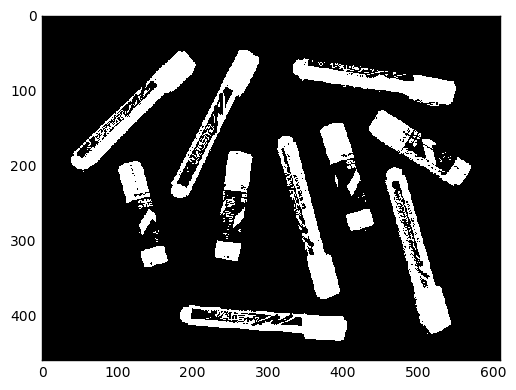

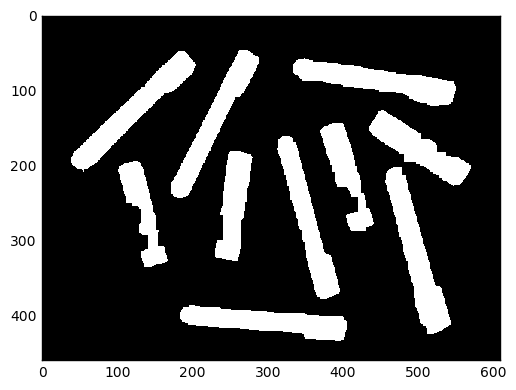

C:\Users\whkj\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


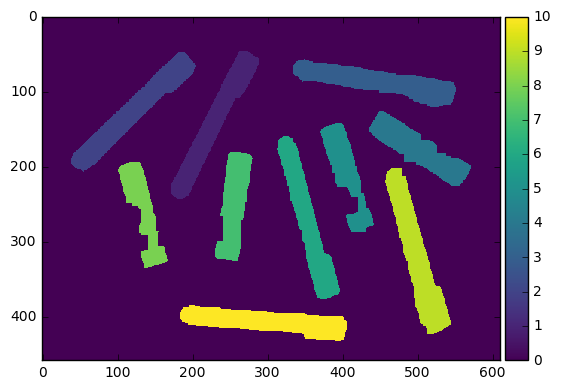

In [53]:
#from skimage.filters import threshold_isodata
#change into gray scale and show
gray_objets = rgb2gray(objets_img)
plt.figure
imshow(gray_objets)
plt.show()

#threshold 
thresh = threshold_otsu(gray_objets)
print (thresh)
binary_objets = gray_objets <= thresh

#show the binary image
plt.figure
imshow(binary_objets)
plt.show()

#closeing the gray scale image
binary_objets = binary_closing (binary_objets, square(18))
plt.figure
imshow(binary_objets)
plt.show()

#label the image and show
label_objets = label(binary_objets, connectivity=2)
plt.figure
imshow(label_objets)
plt.show() 



In [71]:
#get the number of objets
regions = regionprops(label_objets)
print ('The number of objets are: {}' .format(len(regions)) )

#distinguish two different objets with their max length and count
idx_l = 0
idx_s = 0
for obj in regions:
    len_objets = obj.major_axis_length 
    #print (len_objets)
    if(len_objets > 200):
        idx_l = idx_l +1
    if(len_objets < 200):
        idx_s = idx_s +1
        
print ('There are two kind of objets in the image')
print ('The number of long objets is {}'.format(idx_l))
print ('The number of short objets is {}'.format(idx_s))
        
    
    
        
    

    

The number of objets are: 10
There are two kind of objets in the image
The number of long objets is 6
The number of short objets is 4
